In [21]:
#LEER TABLA DE DATOS
import pandas as pd
CLU = pd.read_csv('C:/Users/juanj/Workspace/business_Intelligence/BasePFLD-CP.csv', header=0,sep=",")
print(CLUSTER)
print(len(CLUSTER))

       Unnamed: 0        PC1       PC2       PC3      PC29      PC30
0               1 -11.136633 -1.498921  0.602591  0.094593 -0.019211
1               2 -11.963992 -1.419960  0.604750 -0.112819  0.014885
2               3 -12.243751 -1.468333  0.550225 -0.121235  0.002382
3               4 -12.236387 -1.399711  1.071392  0.072085  0.052094
4               5 -11.504635 -1.243190  0.845258  0.079731 -0.001746
...           ...        ...       ...       ...       ...       ...
26746       26747   4.518583 -0.747341 -0.307504  0.049623 -0.027678
26747       26748   4.429396 -0.507531  0.158523 -0.017286 -0.020583
26748       26749   4.204278 -0.438075  0.295611  0.039323 -0.005003
26749       26750   4.479956 -0.753117 -0.377276 -0.021029 -0.019347
26750       26751   4.288141 -0.617210  0.009336  0.047782 -0.021558

[26751 rows x 6 columns]
26751


In [7]:
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# Modificado por: juan jesus torres solano <juan.j.torres.s@gmail.com>

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan

In [22]:
# Generate sample data
c1=CLU['PC1']
c2=CLU['PC2']
c3=CLU['PC3']
c4=CLU['PC29']
c5=CLU['PC30']

X = np.vstack((C1, C2, C3, C4, C5))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=None)


In [31]:
c1=CLU['PC1']
c2=CLU['PC2']
c3=CLU['PC3']
c4=CLU['PC29']
c5=CLU['PC30']

CC1=pd.concat([c1,c2],axis=1)
CC2=pd.concat([c1,c3],axis=1)
CC3=pd.concat([c4,c5],axis=1)
CC4=pd.concat([c1,c4],axis=1)
CC5=pd.concat([c1,c5],axis=1)

C1=CC1.to_numpy()
C2=CC2.to_numpy()
C3=CC3.to_numpy()
C4=CC4.to_numpy()
C5=CC5.to_numpy()


Text(0.5, 1.0, 'Clustering at 0.5 epsilon cut\nDBSCAN')

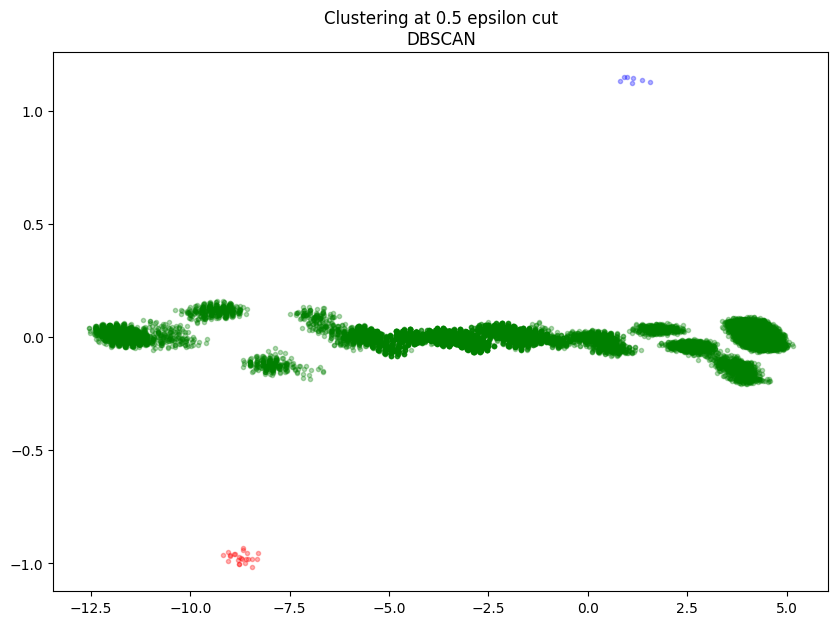

In [45]:
###########################################################################
# Authors: Shane Grigsby <refuge@rocktalus.com>
#          Adrin Jalali <adrin.jalali@gmail.com>
# Modificado por: juan jesus torres solano <juan.j.torres.s@gmail.com>

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import OPTICS, cluster_optics_dbscan

###########################################################################
# Generate sample data
c1=CLU['PC1']
c2=CLU['PC2']
c3=CLU['PC3']
c4=CLU['PC29']
c5=CLU['PC30']

CC1=pd.concat([c1,c2],axis=1)
CC2=pd.concat([c1,c3],axis=1)
CC3=pd.concat([c4,c5],axis=1)
CC4=pd.concat([c1,c4],axis=1)
CC5=pd.concat([c1,c5],axis=1)

C1=CC1.to_numpy()
C2=CC2.to_numpy()
C3=CC3.to_numpy()
C4=CC4.to_numpy()
C5=CC5.to_numpy()


X = np.vstack((C5))

clust = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)

media = np.mean(X)

mascara = np.abs(X - media) > 1.0  # Ajusta el valor según tus necesidades


###########################################################################
# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

###########################################################################
# ploting

plt.figure(figsize=(10, 7))
ax1 = plt.subplot()


# OPTICS
#colors = ["g.", "r.", "b.", "y.", "c."]
#for klass, color in zip(range(0, 5), colors):
#    Xk = X[clust.labels_ == klass]
#    ax1.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.2)
#ax1.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
#ax1.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax1.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax1.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax1.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")




In [50]:
# Guardar los datos clasificados en un archivo .csv
df_050 = pd.DataFrame(labels_050, columns=['Label'])
df_050.to_csv('datos_clasificados_050.csv', index=False)

df_200 = pd.DataFrame(labels_200, columns=['Label'])
df_200.to_csv('datos_clasificados_200.csv', index=False)


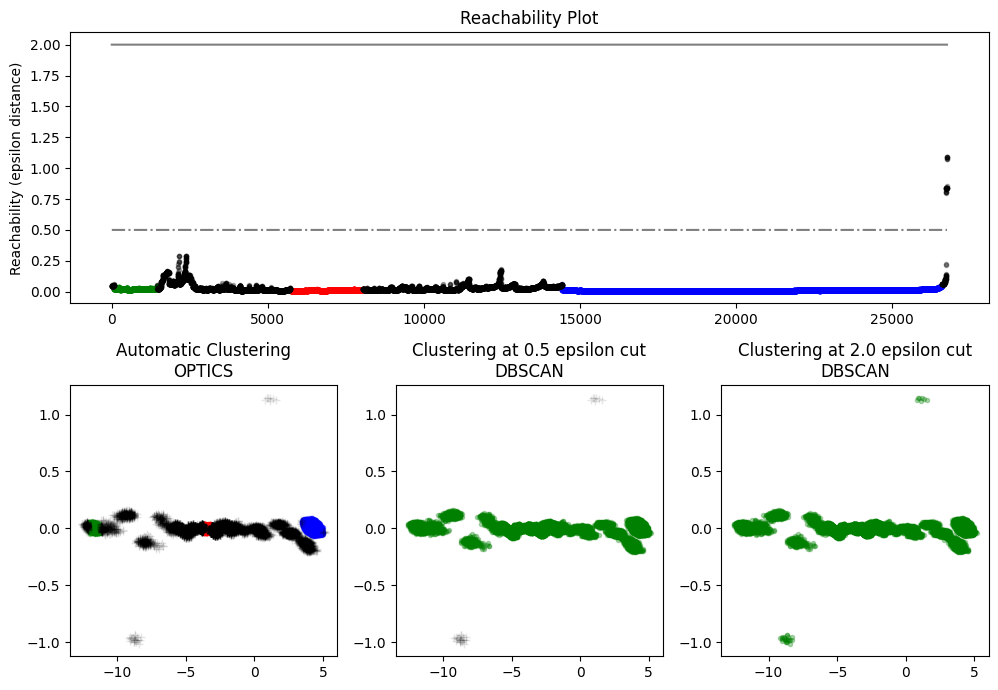

In [44]:


# Generate sample data

#np.random.seed(0)
#n_points_per_cluster = 250

#C1 = [-5, -2] + 0.8 * np.random.randn(n_points_per_cluster, 2)
#C2 = [4, -1] + 0.1 * np.random.randn(n_points_per_cluster, 2)
#C3 = [1, -2] + 0.2 * np.random.randn(n_points_per_cluster, 2)
#C4 = [-2, 3] + 0.3 * np.random.randn(n_points_per_cluster, 2)
#C5 = [3, -2] + 1.6 * np.random.randn(n_points_per_cluster, 2)
#C6 = [5, 6] + 2 * np.random.randn(n_points_per_cluster, 2)
#X = np.vstack((C1, C2, C3, C4, C5))

clust = OPTICS(min_samples=50, xi=0.05, min_cluster_size=0.05)

# Run the fit
clust.fit(X)

labels_050 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=0.5,
)
labels_200 = cluster_optics_dbscan(
    reachability=clust.reachability_,
    core_distances=clust.core_distances_,
    ordering=clust.ordering_,
    eps=2,
)

space = np.arange(len(X))
reachability = clust.reachability_[clust.ordering_]
labels = clust.labels_[clust.ordering_]

plt.figure(figsize=(10, 7))
G = gridspec.GridSpec(2, 3)
ax1 = plt.subplot(G[0, :])
ax2 = plt.subplot(G[1, 0])
ax3 = plt.subplot(G[1, 1])
ax4 = plt.subplot(G[1, 2])

# Reachability plot
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = space[labels == klass]
    Rk = reachability[labels == klass]
    ax1.plot(Xk, Rk, color, alpha=0.3)
ax1.plot(space[labels == -1], reachability[labels == -1], "k.", alpha=0.3)
ax1.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
ax1.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)
ax1.set_ylabel("Reachability (epsilon distance)")
ax1.set_title("Reachability Plot")

# OPTICS
colors = ["g.", "r.", "b.", "y.", "c."]
for klass, color in zip(range(0, 5), colors):
    Xk = X[clust.labels_ == klass]
    ax2.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax2.plot(X[clust.labels_ == -1, 0], X[clust.labels_ == -1, 1], "k+", alpha=0.1)
ax2.set_title("Automatic Clustering\nOPTICS")

# DBSCAN at 0.5
colors = ["g.", "r.", "b.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_050 == klass]
    ax3.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax3.plot(X[labels_050 == -1, 0], X[labels_050 == -1, 1], "k+", alpha=0.1)
ax3.set_title("Clustering at 0.5 epsilon cut\nDBSCAN")

# DBSCAN at 2.
colors = ["g.", "m.", "y.", "c."]
for klass, color in zip(range(0, 4), colors):
    Xk = X[labels_200 == klass]
    ax4.plot(Xk[:, 0], Xk[:, 1], color, alpha=0.3)
ax4.plot(X[labels_200 == -1, 0], X[labels_200 == -1, 1], "k+", alpha=0.1)
ax4.set_title("Clustering at 2.0 epsilon cut\nDBSCAN")

plt.tight_layout()
plt.show()

In [48]:
Xk_green = X[labels_050 == 0]
Xk_green 

array([[-1.11366329e+01, -1.92105307e-02],
       [-1.19639922e+01,  1.48853427e-02],
       [-1.22437514e+01,  2.38162953e-03],
       ...,
       [ 4.20427825e+00, -5.00278431e-03],
       [ 4.47995592e+00, -1.93470605e-02],
       [ 4.28814059e+00, -2.15582278e-02]])

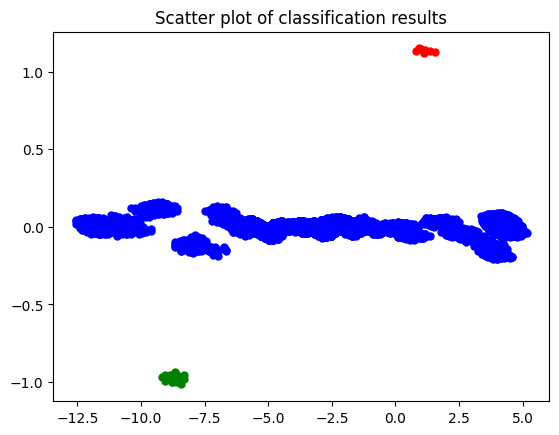

In [49]:
import matplotlib.pyplot as plt

# Asumiendo que 'labels_050' son tus etiquetas de clasificación y 'X' tus datos
unique_labels = set(labels_050)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for color, label in zip(colors, unique_labels):
    if label == -1:  # El ruido se representa en color negro
        color = 'k'
        
    class_member_mask = (labels_050 == label)
    
    xy = X[class_member_mask]
    plt.plot(xy[:, 0], xy[:, 1], color + '.', markersize=10)

plt.title('Scatter plot of classification results')
plt.show()
